# Week 7 Lecture 2

- Simulated Annealing Knapsack
- Simulated Annealing TSP
- Introduction to GAs

# Simulated Annealing Knapsack

7 item knapsack problem.

Max Weight: 20

Items (weight / value):

- (50 / 10)
- (24 / 5)
- (33 / 7)
- (50 / 8)
- (32 / 7)
- (1 / 2)
- (36 / 8)

In [1]:
class Item:
  def __init__(self, value, weight):
    self.weight = weight
    self.value = value

items = [
         Item(50,10),
         Item(24,5),
         Item(33,7),
         Item(50,8),
         Item(32,7),
         Item(1,2),
         Item(36,8)
]

max_weight = 20

In [2]:
import random
import math
import matplotlib.pyplot as plt

# solution is a binary list
def knapsack_value(solution):
    value = sum(items[i].value * solution[i] for i in range(len(solution)))
    total_weight = sum(items[i].weight * solution[i] for i in range(len(solution)))
    if total_weight > max_weight:
        return max_weight - total_weight
    else:
        return value

def simulated_annealing(steps, init_value, eval_func):
    current_value = init_value
    values = [init_value]
    for s in range(steps):
        temp = calculate_temp(s, steps)
        current_value = simulated_annealing_step(temp, current_value, eval_func)
        values.append(current_value)
    
    return values
        
def calculate_temp(step, num_steps):
    init_temp = 1
    alpha = 5
    return init_temp * (1 - alpha/num_steps)**step

def simulated_annealing_step(temp, current_value, eval_func):
    neighbor = generate_neighbor(current_value)
    if accept_neighbor(neighbor, current_value, temp, eval_func):
        return neighbor
    else:
        return current_value
    
def generate_neighbor(current_value):
    alpha = 0.05
    neighbor = []
    for v in current_value:
        if random.random() < alpha:
            neighbor.append(1 - v)
        else:
            neighbor.append(v)
    return neighbor

def accept_neighbor(neighbor, current_value, temp, eval_func):
    value_diff = eval_func(neighbor) - eval_func(current_value)
    prob_accept = math.exp(value_diff / temp)
    return random.random() < prob_accept

In [19]:
steps = 3000

results = simulated_annealing(steps, [0 for i in range(len(items))], knapsack_value)

print(results[-1])
print(knapsack_value(results[-1]))

[0, 1, 1, 1, 0, 0, 0]
107


### Visually we can see how it converged over time.

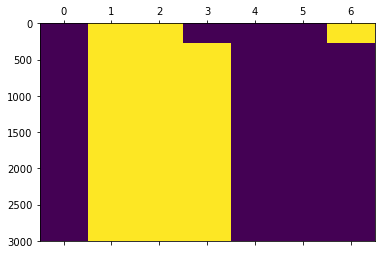

In [20]:
plt.matshow(results, fignum=0, aspect='auto')

### What if we wanted to try a larger knapsack problem?

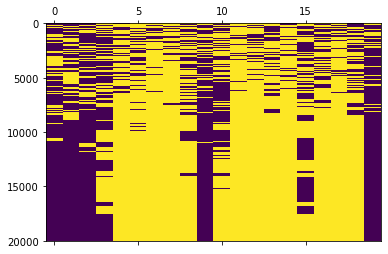

In [44]:
items = [Item(random.random(),random.random()) for _ in range(20)]
max_weight = 7

steps = 20000
results = simulated_annealing(steps, [random.randint(0,1) for i in range(len(items))], knapsack_value)

plt.matshow(results, fignum=0, aspect='auto')

# Simulated Annealing TSP

6 cities random tuples with unit values.

In [46]:
import random
import math
import matplotlib.pyplot as plt

def simulated_annealing(steps, init_value, fitness_func, neighbor_func):
    current_value = init_value
    values = [init_value]
    for s in range(steps):
        temp = calculate_temp(s, steps)
        current_value = simulated_annealing_step(temp, current_value, fitness_func, neighbor_func)
        values.append(current_value)
    
    return values
        
def calculate_temp(step, num_steps):
    init_temp = 1
    alpha = 5
    return init_temp * (1 - alpha/num_steps)**step

def simulated_annealing_step(temp, current_value, fitness_func, neighbor_func):
    neighbor = neighbor_func(current_value)
    if accept_neighbor(neighbor, current_value, temp, fitness_func):
        return neighbor
    else:
        return current_value

def accept_neighbor(neighbor, current_value, temp, eval_func):
    value_diff = eval_func(neighbor) - eval_func(current_value)
    prob_accept = math.exp(value_diff / temp)
    return random.random() < prob_accept

In [48]:
def euclidean_distance(city1, city2):
    return math.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

def tsp_distance(solution):
    total_dist = 0
    current_city = solution[0]
    for city in solution[1:]:
        total_dist += euclidean_distance(current_city, city)
        current_city = city
    
    total_dist += euclidean_distance(solution[0], solution[-1])
    return -total_dist

def tsp_neighbor(solution):
    neighbor = list(solution)
    nodes = random.sample(range(1, len(solution)), k=2)
    neighbor[nodes[0]] = solution[nodes[1]]
    neighbor[nodes[1]] = solution[nodes[0]]
    return neighbor

In [47]:
num_cities = 50
locations = [(random.random(), random.random()) for _ in range(num_cities)]

In [49]:
steps = 100000
results = simulated_annealing(steps, locations, tsp_distance, tsp_neighbor)

In [50]:
def plot_path(path):
    full_path = complete_path(path)
    plt.plot([p[0] for p in full_path], [p[1] for p in full_path])
    plt.show()

def complete_path(path):
    full_path = list(path)
    full_path.append(path[0])
    return full_path

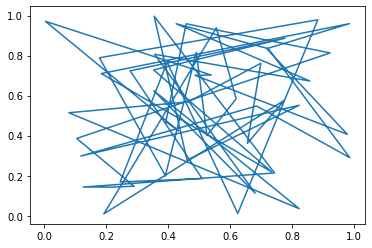

In [51]:
# initial path
plot_path(locations)

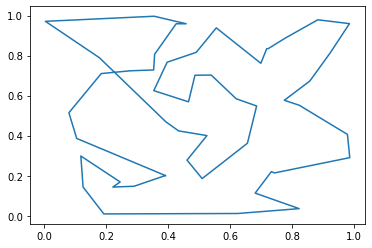

In [52]:
# final path
plot_path(results[-1])

In [53]:
# distance improvement
print(f'Original Distance: {tsp_distance(locations)}, Optimal Distance: {tsp_distance(results[-1])}')

Original Distance: -27.117261265871605, Optimal Distance: -7.3127027515623535


## Let's see if we can animate it

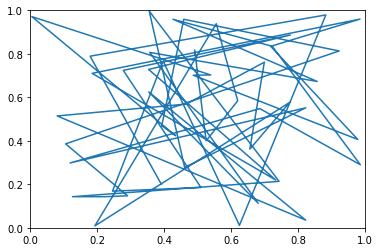

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig,ax = plt.subplots(1,1)

ax.set_xlim((0, 1))
ax.set_ylim((0, 1))

full_path = complete_path(results[0])
plot, = ax.plot([p[0] for p in full_path], [p[1] for p in full_path])

# animation function. This is called sequentially
def animate(i):
    x = [point[0] for point in results[i]]
    y = [point[1] for point in results[i]]
    plot.set_data(x, y)
    return [fig]

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, 
                               frames=5000, interval=20, blit=True)

In [59]:
HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available